# Credit Card Fraud Predictionn

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase

### About the dataset
The dataset is taken from [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data). The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification

### Approach:

* For this project, I would like to test the model performance between imbalance vs balance(SMOTE) vs balance(undersampling)

In [489]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [490]:
#load dataset
df_ori = pd.read_csv("creditcard.csv")
df_ori.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [491]:
df = df_ori.copy() # Make a copy of the DataFrame to avoid modifying the original

# 1. Data Analysis

In [492]:
df.shape

(284807, 31)

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [494]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [495]:
df.duplicated().sum()

1081

In [496]:
duplicates = df[df.duplicated()]
duplicates.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0


In [497]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [498]:
# check for unique value on each column
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

### Findings:

1. There are 1081 duplicated rows. Need to remove them.


# 2. Data Preprocessing

Remove Duplicated rows

In [499]:
df = df.drop_duplicates()

In [500]:
df.shape

(283726, 31)

In [501]:
df.duplicated().sum()

0

# 3. Data Exploration

### 3.1 Distribution of Data

In [502]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

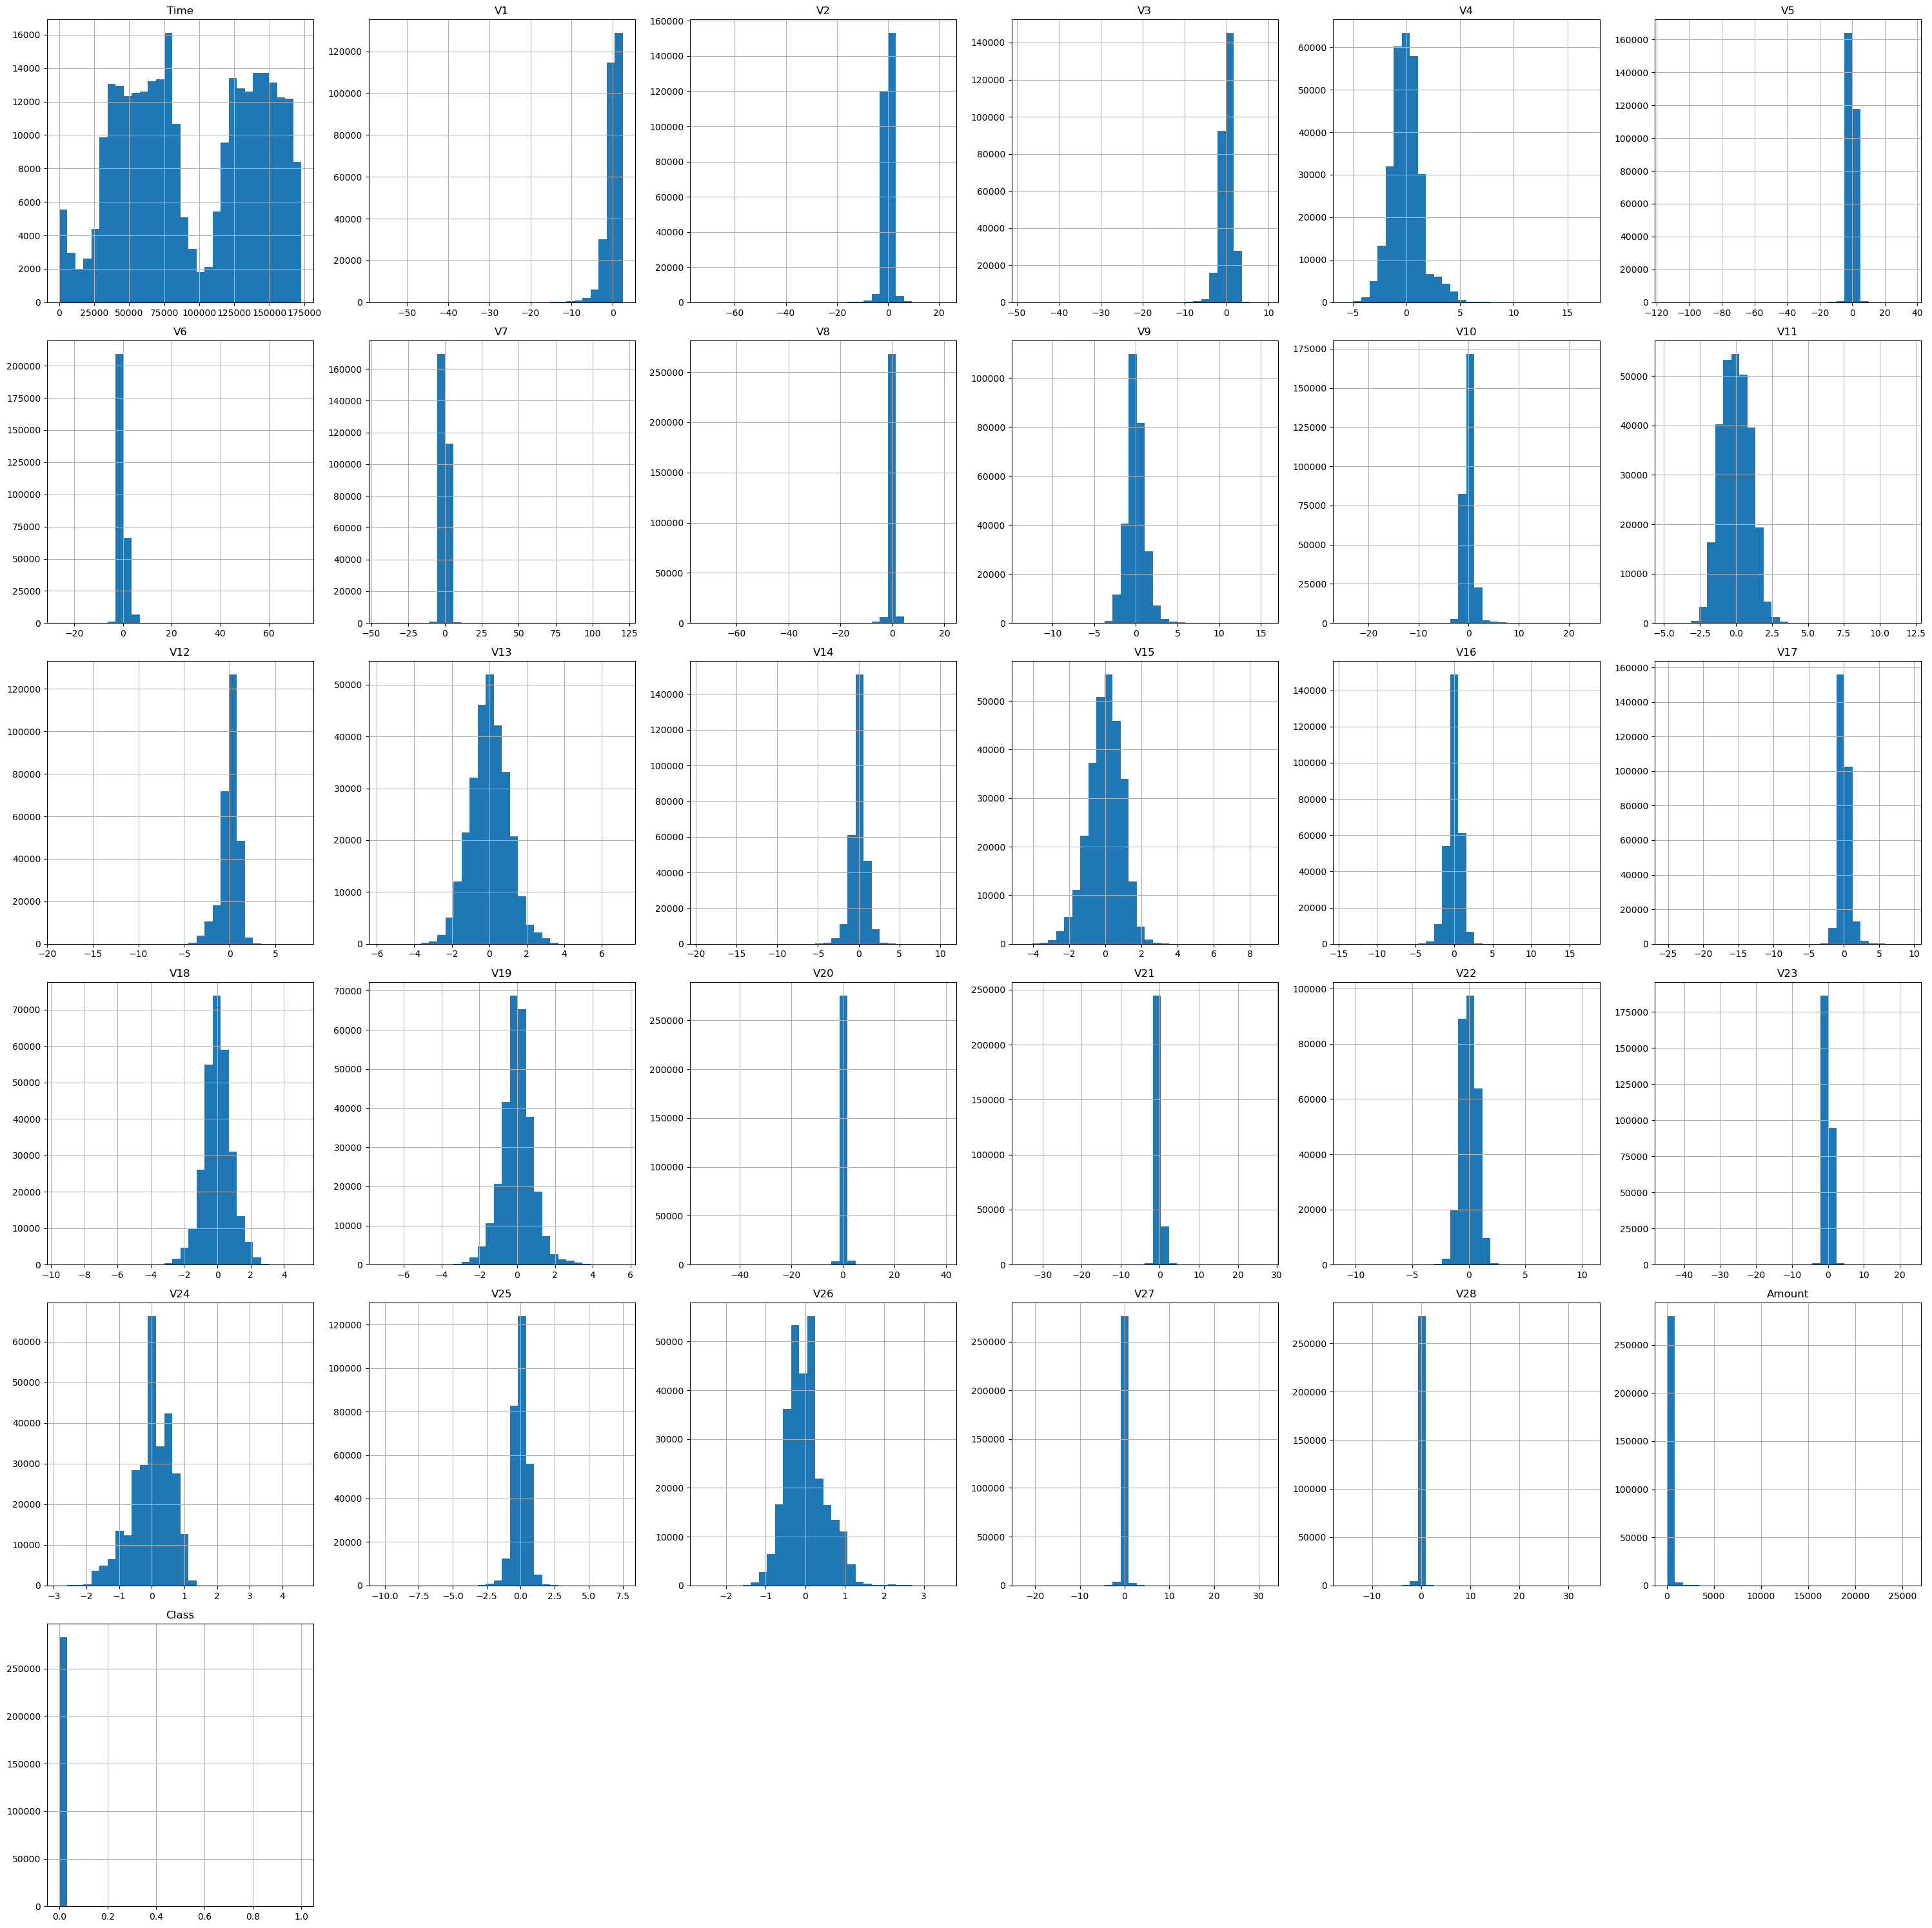

In [503]:
# Quick data distribution overview
df.hist(bins=30, figsize=(30, 30))
plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

#### Observations:
* all of the features from V1-V28 has a quick good distribution with mean 0.
* majority of the "Amount" at 0-30, with max value up to 25000. There might be outliers in the feature.

In [504]:
# Filter the DataFrame to include only rows where churn occurred (Churn == 1)
fraud_df = df[df['Class'] == 1]
not_fraud_df = df[df['Class'] == 0]

fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,...,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.0
mean,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860,1.0
std,48636.179973,6.593145,4.122500,6.909647,2.871523,5.278831,1.715347,6.858024,5.585950,2.465047,...,2.731191,1.181295,1.508570,0.517900,0.806785,0.463016,1.245779,0.533100,260.211041,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41203.000000,-5.603690,1.145381,-7.926507,2.288644,-4.278983,-2.450444,-6.989195,-0.161518,-3.796760,...,0.027935,-0.521934,-0.341881,-0.436539,-0.320311,-0.263078,-0.015551,-0.097223,1.000000,1.0
50%,73408.000000,-2.271755,2.617105,-4.875397,4.100098,-1.372245,-1.420468,-2.902079,0.617738,-2.099049,...,0.573898,0.055179,-0.075034,-0.061263,0.077913,0.012792,0.394682,0.145895,9.820000,1.0
75%,129095.000000,-0.361428,4.571743,-2.171454,6.290918,0.260821,-0.413647,-0.907188,1.709417,-0.788388,...,1.192694,0.616383,0.287659,0.282030,0.463827,0.395528,0.821048,0.372393,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [505]:
not_fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,...,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.000000,283253.0
mean,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.001150,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575,0.0
std,47475.550607,1.922179,1.633520,1.457593,1.398575,1.355816,1.329914,1.177480,1.157140,1.086902,...,0.715629,0.723541,0.621165,0.605748,0.520612,0.482080,0.392700,0.327563,250.379023,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54233.000000,-0.913431,-0.601398,-0.883966,-0.851605,-0.687888,-0.767543,-0.550146,-0.208841,-0.641649,...,-0.228406,-0.542737,-0.161490,-0.354306,-0.317476,-0.326853,-0.070650,-0.052808,5.670000,0.0
50%,84711.000000,0.022562,0.062561,0.182247,-0.024500,-0.052807,-0.274172,0.041664,0.021633,-0.051368,...,-0.029798,0.006675,-0.011077,0.041115,0.016190,-0.052293,0.001368,0.011238,22.000000,0.0
75%,139308.000000,1.316788,0.797012,1.028261,0.734231,0.612442,0.397678,0.571029,0.324473,0.596969,...,0.185470,0.528136,0.147633,0.440051,0.350490,0.240023,0.090760,0.077961,77.460000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


#### 3.1.1 Fraud Distribution

In [506]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

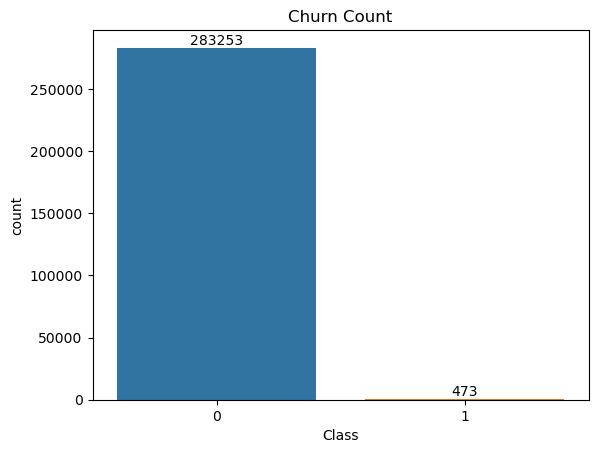

In [507]:
sns.countplot(x='Class', data= df)

# Annotate count values
for i, count in enumerate(df['Class'].value_counts()):
    plt.text(i, count, str(count), ha = 'center',va='bottom')

plt.title("Churn Count")
plt.show()

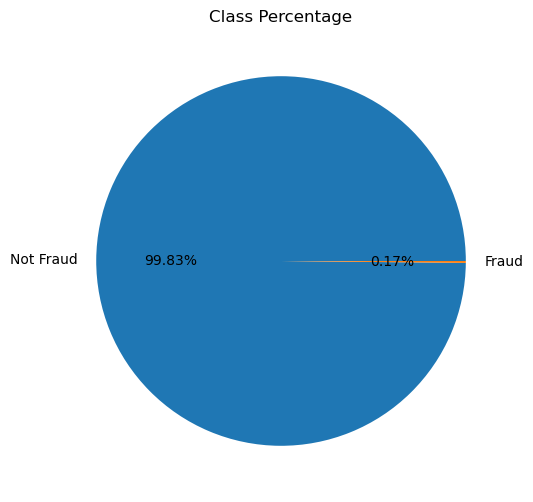

In [508]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(df['Class'].value_counts(), labels=['Not Fraud','Fraud'], autopct='%1.2f%%')
plt.title('Class Percentage')
plt.show()

# Findings:
* The dataset is highly unbalanced.
* After remove duplicated, I got 473 frauds and 283253 not fraud.
* The dataset only contain 0.17% of fraud dataset.
* Can try to compare training with SMOTE dataset and Undersampling method.

#### 3.1.2 Time Distribution

 Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

In [509]:
df['Time'].value_counts()

Time
3767.0      21
3770.0      20
19912.0     19
3750.0      19
73885.0     17
            ..
127732.0     1
62217.0      1
127739.0     1
127741.0     1
172792.0     1
Name: count, Length: 124592, dtype: int64

In [510]:
df['Time'].describe()

count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64

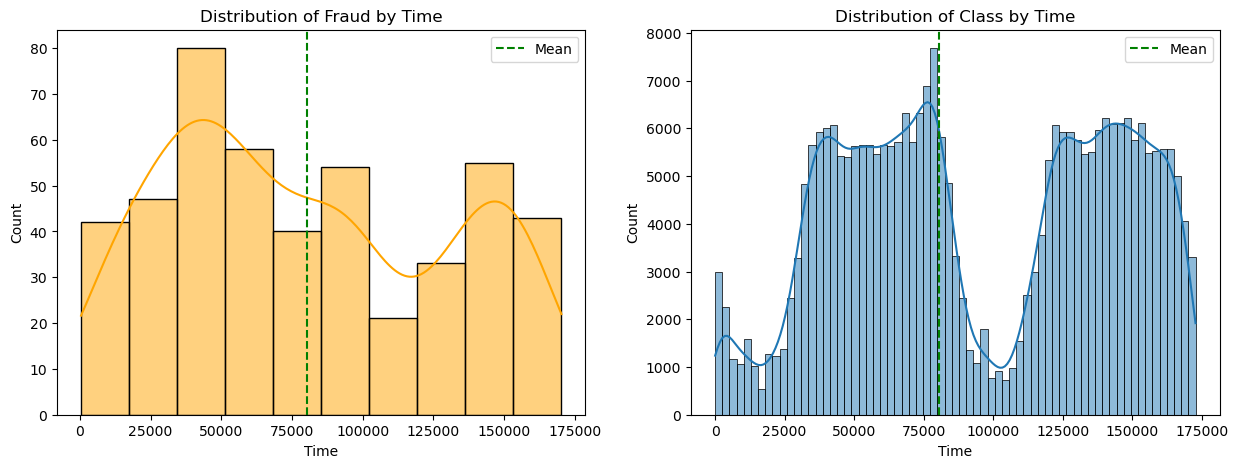

In [511]:
# histogram for age distribution
fig,ax = plt.subplots(1,2,figsize=(15,5))

# Plot with Bin to have a better visualization of the data. Without bin, there might be misunderstanding of the data.
sns.histplot(x = 'Time', data=fraud_df, multiple='stack', kde=True, ax=ax[0], color='orange')
ax[0].set_title('Distribution of Fraud by Time')
# derive the line of mean
ax[0].axvline(fraud_df['Time'].mean(), color='g', linestyle='--', label='Mean')
ax[0].legend()

sns.histplot(x = 'Time', data = df, multiple='stack', kde=True, ax=ax[1])
ax[1].set_title('Distribution of Class by Time')
ax[1].axvline(fraud_df['Time'].mean(), color='g', linestyle='--', label='Mean')
ax[1].legend()
plt.show()

In [512]:
fraud_df['Time'].mean()

80450.51374207188

### Observations:

1. From the fraud distribution with transaction time. It is hard to identify if specific time contribute to credit card fraud cases.
2. However, average transaction time for credit card fraud cases is 80450.5137s
3. The standard deviation (std) of the Time distribution is quite high.

#### 3.1.3 Amount Distribution

In [513]:
df['Amount'].value_counts()

Amount
1.00      13566
1.98       6044
0.89       4871
9.99       4738
15.00      3280
          ...  
526.60        1
248.16        1
492.65        1
811.50        1
95.63         1
Name: count, Length: 32767, dtype: int64

In [514]:
df['Amount'].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

From here we can see, the min value is 0, mean 88.47, but the max is 25691.16. There are outliers or anomaly in this features distribution

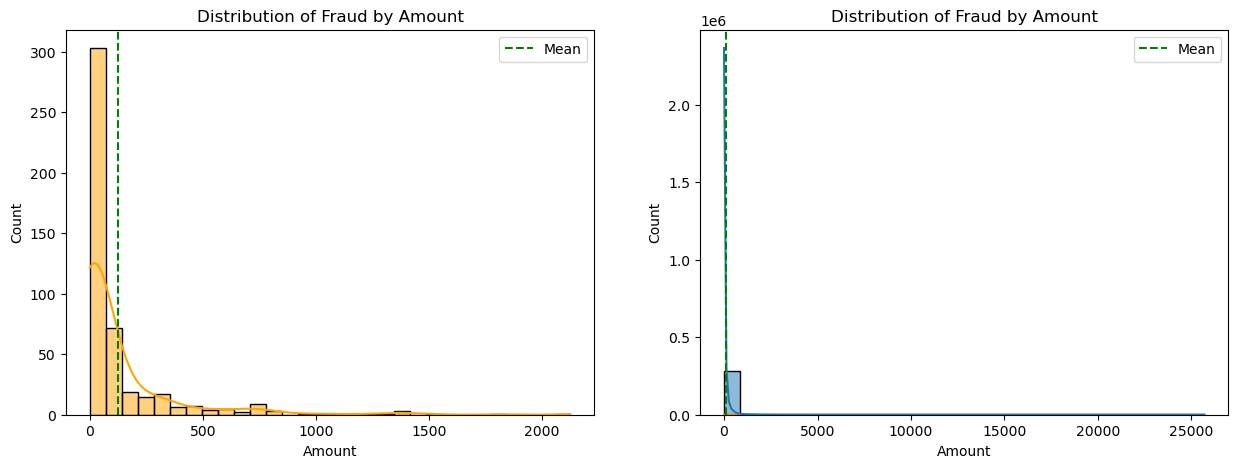

In [515]:
# histogram for age distribution
fig,ax = plt.subplots(1,2,figsize=(15,5))

# Plot with Bin to have a better visualization of the data. Without bin, there might be misunderstanding of the data.
sns.histplot(x = 'Amount', data=fraud_df, bins=30, multiple='stack', kde=True, ax=ax[0], color='orange')
ax[0].set_title('Distribution of Fraud by Amount')
ax[0].axvline(fraud_df['Amount'].mean(), color='g', linestyle='--', label='Mean')
ax[0].legend()

sns.histplot(x = 'Amount', data = df, bins=30, hue='Class', multiple='stack', kde=True, ax=ax[1])
ax[1].set_title('Distribution of Fraud by Amount')
ax[1].axvline(fraud_df['Amount'].mean(), color='g', linestyle='--', label='Mean')
ax[1].legend()
plt.show()

#NOTE: Blue "0" is actually the total count of age and not represent "not Churn"

In [516]:
fraud_df['Amount'].mean()

123.87186046511628

### Check for Outliers

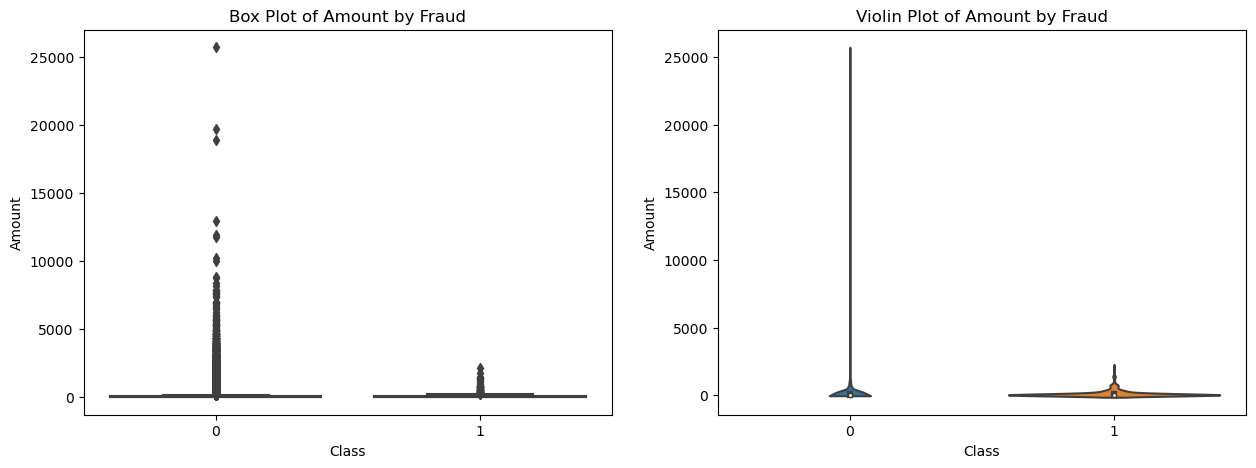

In [517]:
# Check for outliers
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x ='Class' , y = 'Amount', data=df ,ax=ax[0])
ax[0].set_title('Box Plot of Amount by Fraud')

sns.violinplot(x ='Class' , y = 'Amount', data=df ,ax=ax[1])
ax[1].set_title('Violin Plot of Amount by Fraud')
plt.show()

In [518]:
# set limit here
range = 200

# Try to see how any rows with amount above 100
amount_above_range = df[df['Amount'] > range]

# Count the number of rows where the 'Amount' column is above 100
count_above_range = amount_above_range.shape[0]

print(f"Number of rows with amount above {range}:, {count_above_range}")

Number of rows with amount above 200:, 28770


### Findings:

* From here we can see, the min value is 0, mean 88.47, but the max is 25691.16. There are outliers or anomaly in this features distribution.
* Amount 0-50 contribute to higher credit card fraud cases.
* If I use IQR to remove outliers, I will remove more than 28k data (already tested seperately). I don't want to remove too many dataset since it might be the real world case scenario and not anomalies.
* Try a different approach to handle this case:
    - apply logarithmic transformation
    - check for outliers
    - apply IQR on log data to remove outliers
    - This might reduce the number of removed dataset

# 4. Data Pre-Processing-2

#### 4.1 Remove Outliers Directly using IQR

In [519]:
df_iqr = df.copy()

In [520]:
df_iqr.shape

(283726, 31)

In [521]:
Q1 = df_iqr['Amount'].quantile(0.25)
Q3 = df_iqr['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_iqr = df_iqr[(df_iqr['Amount'] >= lower_bound) & (df_iqr['Amount'] <= upper_bound)]

In [522]:
df_iqr.shape

(252041, 31)

In [523]:
df_iqr['Class'].value_counts()

Class
0    251655
1       386
Name: count, dtype: int64

#### Observations:
* Calculate the number of removed outliers, 283,726-252,041 = 31,685
* Also it will remove Class 1 value too from 473-386 = 87. I will have lesser dataset for fraud.

#### 4.1 Logarithmic transformation and IQR Method
Instead of removing outliers, try to transform the data logarithmically.
* In this case, the outliers might be a real data. When using remove outliers with IQR method, large amount of dataset has been remove (more than 30k rows). It is not good to remove such large amount of dataset. Hence we will use Logarithmic transformation to handle the outliers.

In [524]:
# Logarithmic transformation using natural logarithm (base e)
df['Amount_log'] = np.log1p(df['Amount'])  # np.log1p() computes log(1 + x) to avoid undefined values for zero or negative values

# Remove the original 'Amount' column
df.drop(columns=['Amount'], inplace=True)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.014760
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.305626
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.939276
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.824306
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.262539


In [525]:
df['Amount_log'].describe()

count    283726.000000
mean          3.153760
std           1.657080
min           0.000000
25%           1.887070
50%           3.135494
75%           4.363226
max          10.153941
Name: Amount_log, dtype: float64

In [526]:
fraud_log_amount_df = df[df['Class'] == 1]

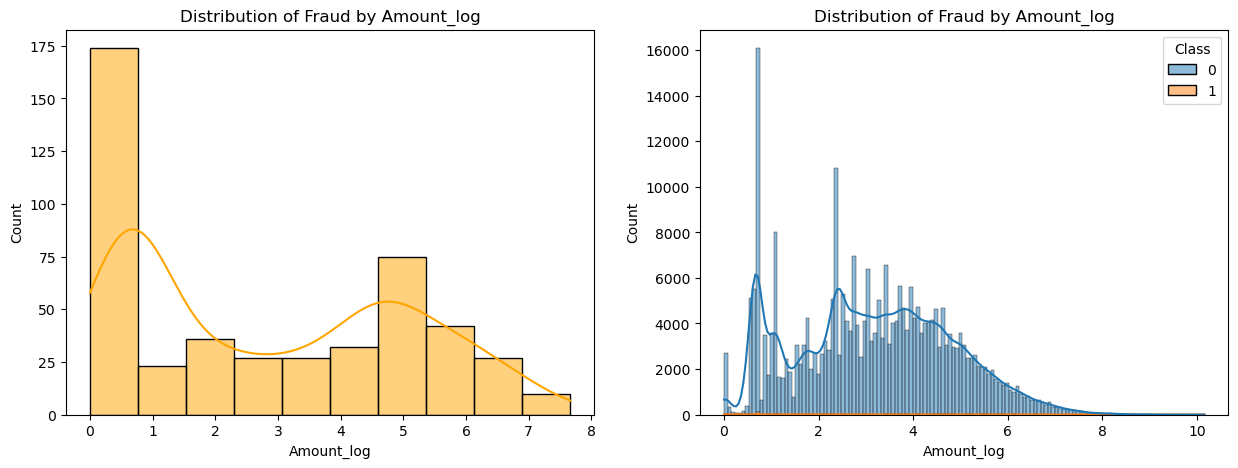

In [527]:
# histogram for age distribution
fig,ax = plt.subplots(1,2,figsize=(15,5))

# Plot with Bin to have a better visualization of the data. Without bin, there might be misunderstanding of the data.
sns.histplot(x = 'Amount_log', data=fraud_log_amount_df, multiple='stack', kde=True, ax=ax[0], color='orange')
ax[0].set_title('Distribution of Fraud by Amount_log')

sns.histplot(x = 'Amount_log', data = df, hue='Class', multiple='stack', kde=True, ax=ax[1])
ax[1].set_title('Distribution of Fraud by Amount_log')
plt.show()

#NOTE: Blue "0" is actually the total count of age and not represent "not Churn"

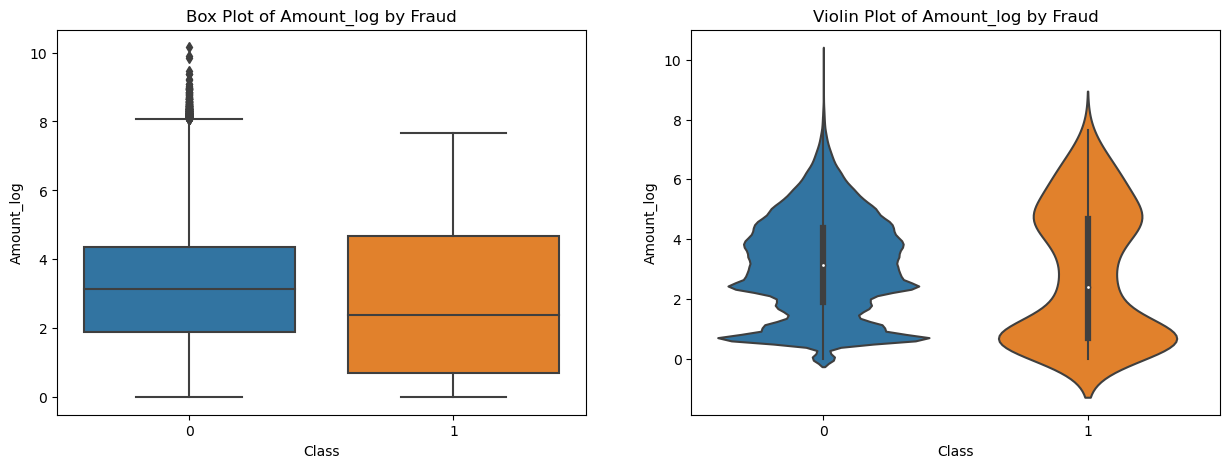

In [528]:
# Check for outliers
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x ='Class' , y = 'Amount_log', data=df ,ax=ax[0])
ax[0].set_title('Box Plot of Amount_log by Fraud')

sns.violinplot(x ='Class' , y = 'Amount_log', data=df ,ax=ax[1])
ax[1].set_title('Violin Plot of Amount_log by Fraud')
plt.show()

### Findings:

* After implementing logarithmic transformation on Amount features, we can see the data has lesser outliers.
* I try to reduce in removing the dataset since it might be a real world scenario data.

#### 4.2 Remove Outliers
Removing outlier from claims values column using IQR method. Can also use z-score method

### 4.1.1 IQR Method

In [529]:
df.shape

(283726, 31)

In [530]:
Q1 = df['Amount_log'].quantile(0.25)
Q3 = df['Amount_log'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df = df[(df['Amount_log'] >= lower_bound) & (df['Amount_log'] <= upper_bound)]

In [531]:
df.shape

(283490, 31)

In [532]:
df['Class'].value_counts()

Class
0    283017
1       473
Name: count, dtype: int64

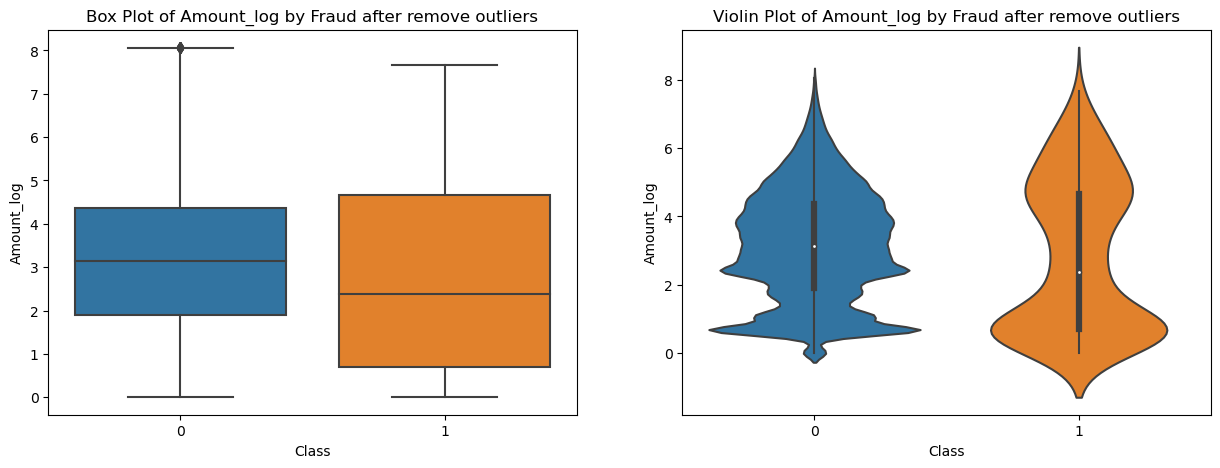

In [533]:
# Check for outliers
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x ='Class' , y = 'Amount_log', data=df ,ax=ax[0])
ax[0].set_title('Box Plot of Amount_log by Fraud after remove outliers')

sns.violinplot(x ='Class' , y = 'Amount_log', data=df ,ax=ax[1])
ax[1].set_title('Violin Plot of Amount_log by Fraud after remove outliers')
plt.show()

#### Observations:
* Comparison on handling outliers approach:

METHOD A: REMOVE OUTLIERS DIRECTLY FROM ORIGINAL "AMOUNT" DATA
* Calculate the number of removed outliers, 283,726-252,041 = 31,685
* Also it will remove Class 1 value too from 473-386 = 87. I will have lesser dataset for fraud.

METHOD B: REMOVE OUTLIERS DIRECTLY FROM ORIGINAL "AMOUNT_LOG" DATA
* Compare to direct remove outlier, using log then IQR, I only remove outliers, 283,726-283490= 236 rows only
* AND NO FRAUD data hase been removed!!!

## Coorelation Matrix Heatmap

Look for patterns of high correlation (either positive or negative) between variables.
* Variables with high positive correlation may provide redundant information. In such cases, you may consider removing one of the variables to reduce multicollinearity.
* Variables with high negative correlation may also indicate redundancy, but they could also provide contrasting information. Be cautious about removing variables solely based on negative correlation.

In [534]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_log
Time,1.000000,0.119637,-0.011006,-0.426613,-0.106251,0.181776,-0.064732,0.091099,-0.038292,-0.007888,...,0.046722,0.144215,0.055785,-0.015831,-0.235089,-0.041869,-0.005436,-0.009832,-0.012366,-0.028351
V1,0.119637,1.000000,-0.039781,-0.031256,0.015961,-0.043082,0.020839,0.037932,-0.011751,0.000778,...,0.008382,-0.010481,-0.014434,0.000634,-0.005043,-0.002500,-0.006452,-0.004979,-0.095941,-0.086967
V2,-0.011006,-0.039781,1.000000,-0.032649,0.023734,-0.044862,0.026089,0.080337,-0.010693,-0.003570,...,0.016447,-0.019069,-0.027226,0.002134,-0.013854,-0.005187,0.008865,0.008710,0.088068,-0.450097
V3,-0.426613,-0.031256,-0.032649,1.000000,0.014191,-0.049073,0.023361,0.040644,-0.013775,-0.005539,...,0.005412,-0.006854,-0.013527,0.001955,-0.003716,-0.000803,0.008657,-0.003827,-0.184579,-0.023229
V4,-0.106251,0.015961,0.023734,0.014191,1.000000,0.018408,-0.010187,-0.017835,0.005542,0.003135,...,-0.006137,0.005565,0.008298,-0.000851,0.003630,0.002032,-0.001183,-0.000657,0.129947,-0.010022
V5,0.181776,-0.043082,-0.044862,-0.049073,0.018408,1.000000,0.061591,0.110989,-0.025078,-0.006137,...,-0.007536,-0.005306,-0.007165,0.004741,-0.000468,0.002083,0.042948,-0.021454,-0.092375,-0.282002
V6,-0.064732,0.020839,0.026089,0.023361,-0.010187,0.061591,1.000000,-0.075090,0.019825,0.002269,...,0.006179,0.002104,-0.000847,-0.001101,-0.000822,-0.001611,-0.031948,0.014183,-0.044657,0.156904
V7,0.091099,0.037932,0.080337,0.040644,-0.017835,0.110989,-0.075090,1.000000,0.023663,0.001638,...,0.016411,0.003668,-0.003464,-0.004472,-0.002796,-0.001008,-0.057276,0.022685,-0.184654,0.076884
V8,-0.038292,-0.011751,-0.010693,-0.013775,0.005542,-0.025078,0.019825,0.023663,1.000000,0.000516,...,0.014669,-0.008190,-0.009836,0.002197,-0.002729,-0.001056,0.017428,-0.004926,0.033167,-0.016803
V9,-0.007888,0.000778,-0.003570,-0.005539,0.003135,-0.006137,0.002269,0.001638,0.000516,1.000000,...,0.003242,0.000692,0.009619,-0.000497,0.001177,0.001147,0.007282,0.004345,-0.094144,-0.080155


In [535]:
# using correlation statistical method to find the relation between the churn and other features
df.corr()['Class'].sort_values(ascending=False)

Class         1.000000
V11           0.149188
V4            0.129947
V2            0.088068
V19           0.033656
V8            0.033167
V21           0.026691
V20           0.023838
V27           0.022554
V28           0.009885
V22           0.004842
V26           0.004253
V25           0.003180
V15          -0.003280
V13          -0.003883
V23          -0.007035
V24          -0.007210
Amount_log   -0.007723
Time         -0.012366
V6           -0.044657
V5           -0.092375
V9           -0.094144
V1           -0.095941
V18          -0.105470
V3           -0.184579
V7           -0.184654
V16          -0.187636
V10          -0.207754
V12          -0.250941
V14          -0.293690
V17          -0.313682
Name: Class, dtype: float64

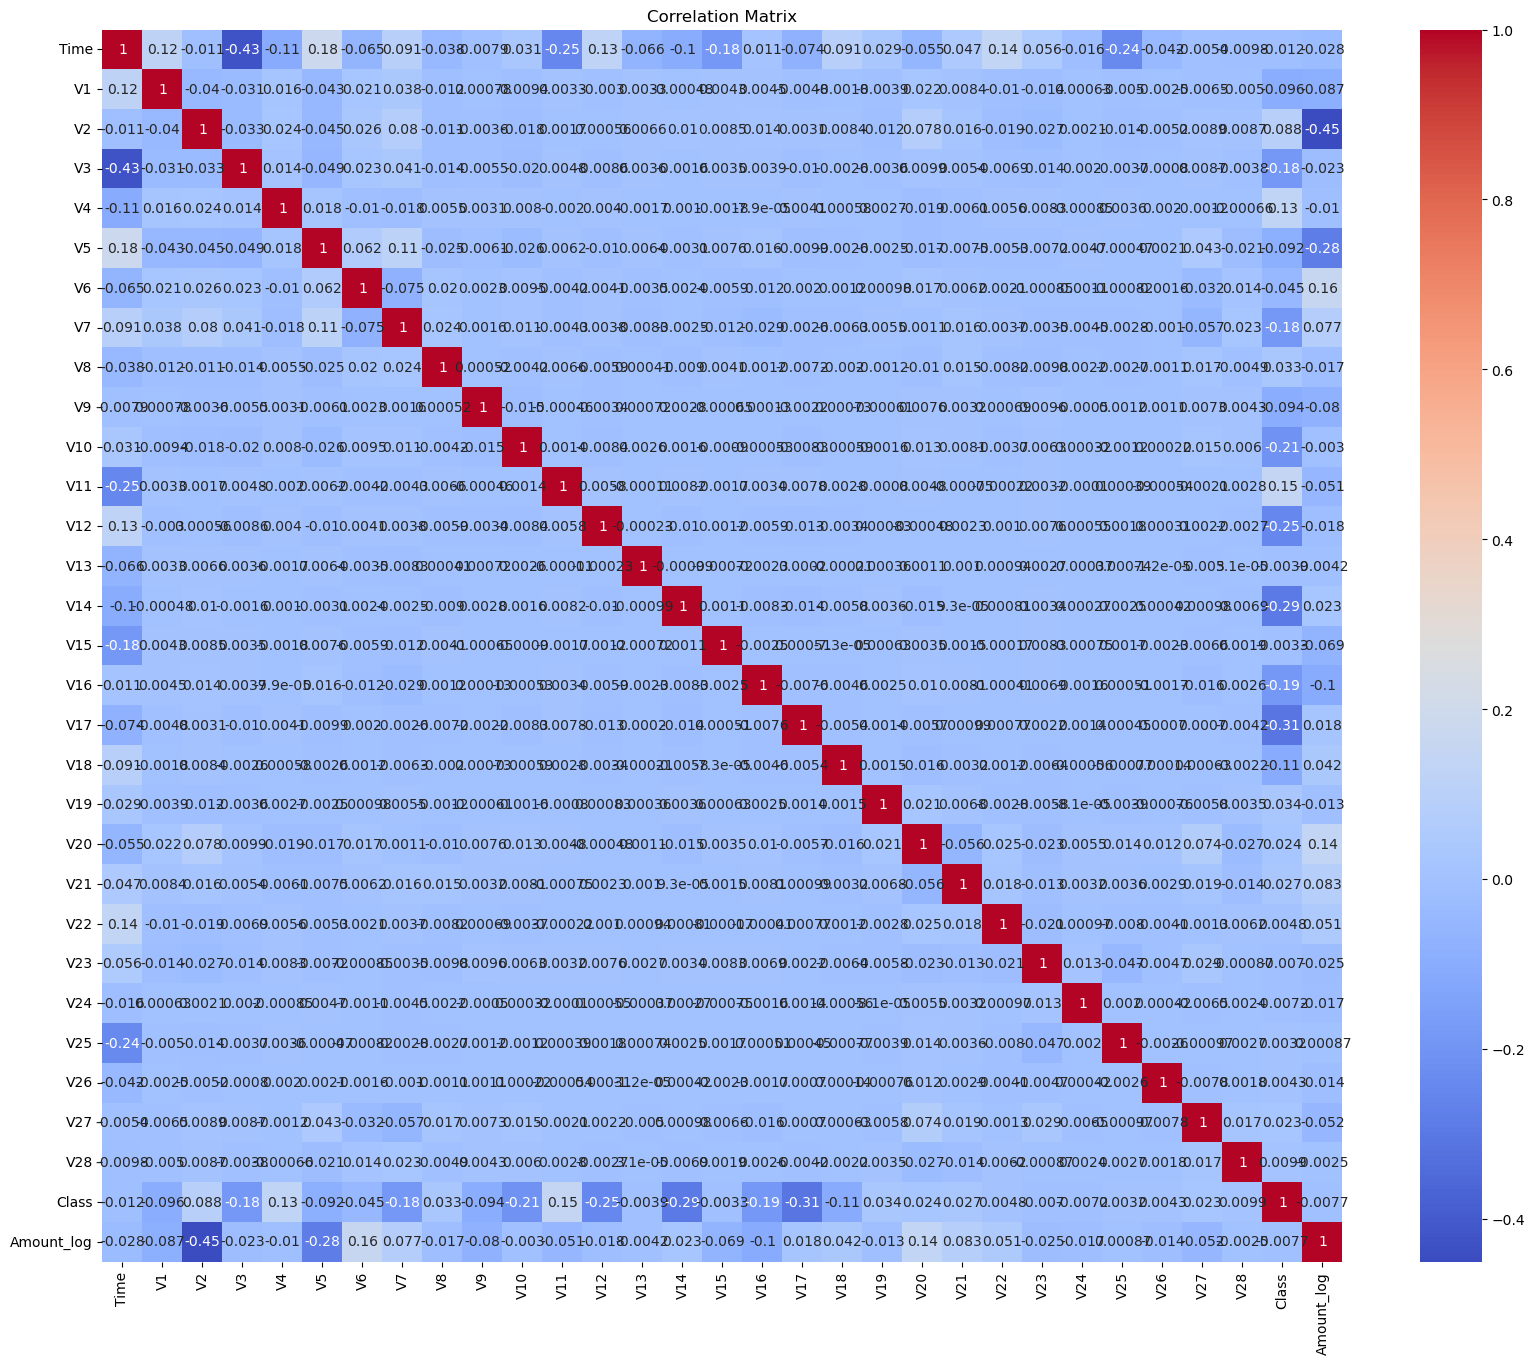

In [536]:
#Correlation Matrix Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: >

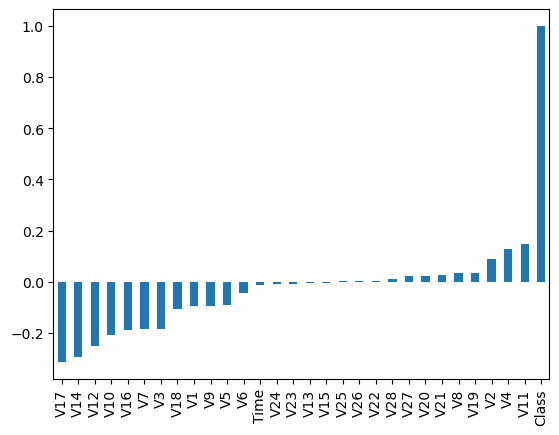

In [537]:
df.corr()['Class'][:-1].sort_values().plot(kind='bar')

### Findings:

* No features with high correlation between each others. No features need to be removed.

# Handling Imbalance Dataset:
Using conventional predictive models such as Decision Trees, Logistic Regression, etc. could not be effective when dealing with an imbalanced dataset, because they might be biased toward predicting the class with the highest number of observations, and considering those with fewer numbers as noise. 

The most commonly used approaches include sampling techniques or harnessing the power of cost-sensitive algorithms. 

## Sampling Techniques 
These techniques aim to balance the distribution of the original by: 

* Cluster-based Oversampling:
* Random undersampling: random elimination of examples from the majority class. 
* SMOTE Oversampling: random replication of examples from the minority class. 

## Cost-Sensitive Algorithms 
These algorithms take into consideration the cost of misclassification. They aim to minimize the total cost generated by the models.

* Cost-sensitive Decision Trees.
* Cost-sensitive Logistic Regression. 
* Cost-sensitive Support Vector Machines.

### CREATE COPIES OF CLEANED DATASET

In [538]:
df_smote = df.copy()
df_under = df.copy()

### METHOD 1: SMOTE OVERSAMPLING

* In this case, the oversampling would be quite dramatic, to oversample data of 473 to 283k data.


In [539]:
from imblearn.over_sampling import SMOTE

In [540]:
# Separate features and target variable
X = df_smote.drop('Class', axis=1)  # Assuming 'target_column_name' is the name of your target column
y = df_smote['Class']

In [541]:
# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
# smote = SMOTE(sampling_strategy='minority')

# Apply SMOTE to the data
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X, y)

# If you want to convert back to DataFrame after resampling
# resampled_df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
# resampled_df['target'] = y_resampled

In [542]:
# Check if the data is balance
y_train_SMOTE.value_counts()

Class
0    283017
1    283017
Name: count, dtype: int64

In [543]:
df_smote.duplicated().sum()

0

In [544]:
X_train_SMOTE

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_log
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566029,39838.875934,-0.537931,-0.741968,-0.963678,1.885292,-1.372168,0.277214,2.576041,-0.325037,0.259015,...,1.414102,0.321893,0.341425,1.199501,0.042970,0.443162,-0.067421,-0.244571,-0.099163,5.458647
566030,62039.287994,-1.647899,2.527138,-2.920302,2.998721,-2.442111,-0.523934,-2.244318,1.204707,-1.917884,...,0.211416,0.648589,0.201969,-0.078381,-0.505839,-0.066969,-0.001114,0.260480,0.163998,5.174680
566031,45642.168160,-1.426385,2.021021,-1.272181,1.205615,-0.341267,-1.339547,-1.582727,-0.232243,-1.359864,...,0.269826,0.989218,-0.034775,-0.257217,0.008628,0.141621,-0.540840,0.508288,0.055295,0.693147
566032,11594.643886,0.697750,4.328621,-7.790041,7.541843,0.914060,-2.884373,-1.811450,0.485142,-2.472236,...,0.605119,0.412834,0.030917,0.147029,-0.472209,-0.721188,0.482832,0.735908,0.227008,0.693147


### METHOD 2: UNDERSAMPLING

* I will try to remove non fraud data until matched with fraud data


In [545]:
from imblearn.under_sampling import RandomUnderSampler

In [546]:
# Separate features and target variable
X = df_under.drop('Class', axis=1)  # Assuming 'target_column_name' is the name of your target column
y = df_under['Class']

In [547]:
# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_train_UNDER, y_train_UNDER = rus.fit_resample(X, y)

# If want to convert the resampled data back into a DataFrame
# df_resampled = pd.concat([pd.DataFrame(X_train_UNDER, columns=X.columns), pd.DataFrame(y_train_UNDER, columns=['Class'])], axis=1)

In [548]:
# Check if the data is balance
y_train_UNDER.value_counts()

Class
0    473
1    473
Name: count, dtype: int64

### METHOD 3: MIX MODE

* The idea is to reduce the non fraud dataset to maybe 5000 and SMOTE 473 fraud dataset to 5000

In [549]:
# fraud_df = df[df['Class'] == 1]
# not_fraud_df = df[df['Class'] == 0]

# Sample 5000 non-fraud samples without replacement
number_of_sample:int = 5000
not_fraud_df = not_fraud_df.sample(n=number_of_sample, replace=False, random_state=42)

# Concatenate the sampled non-fraud data with the fraud data
balanced_df = pd.concat([not_fraud_df, fraud_df], axis=0)

# Shuffle the DataFrame to mix the samples
df_mix = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [550]:
df_mix['Class'].value_counts()

Class
0    5000
1     473
Name: count, dtype: int64

In [551]:
# Apply SMOTE on df_mix dataset

# Separate features and target variable
X = df_mix.drop('Class', axis=1)  # Assuming 'target_column_name' is the name of your target column
y = df_mix['Class']

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
# smote = SMOTE(sampling_strategy='minority')

# Apply SMOTE to the data
X_train_MIX, y_train_MIX = smote.fit_resample(X, y)


In [552]:
y_train_MIX.value_counts()

Class
1    5000
0    5000
Name: count, dtype: int64

## Train/Test Split

In [553]:
# Split SMOTE dataset
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_train_SMOTE, y_train_SMOTE, test_size=0.3, random_state=42)

In [554]:
# Split UNDERSAMPING dataset
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_train_UNDER, y_train_UNDER, test_size=0.3, random_state=42)

In [555]:
# Split MIX MODE dataset
X_train_mix, X_test_mix, y_train_mix, y_test_mix = train_test_split(X_train_MIX, y_train_MIX, test_size=0.3, random_state=42)

## Model Building

Since this is a binary-classification problem, we can try build a ML model using the following architecture:

1. Logistic Regression
2. Naive Bayes
3. Decision Tree Classifier - Can handle Categorical & Numerical
4. Random Forest Classifier - Can handle Categorical & Numerical
5. XGBoost Classifier
6. CatBoost

### 1. Logistic Regression

In [556]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000, random_state=42, verbose=False)
lr

LogisticRegression(max_iter=1000, random_state=42, verbose=False)

In [557]:
def model_train(classifier:str, X_train:pd.DataFrame, y_train:pd.DataFrame, X_test:pd.DataFrame, y_test:pd.DataFrame, dataset_type:str):
    # Training the model
    classifier.fit(X_train, y_train)

    # Calculating training accuracy
    train_accuracy = classifier.score(X_train, y_train)
    print(f"Training Accuracy ({dataset_type}): {train_accuracy}")

    # Calculate test accuracy
    test_pred = classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    print(f"Test Accuracy ({dataset_type}): {test_accuracy}")

    return test_pred


In [558]:

# SMOTE Dataset
dataset_type = "SMOTE"
lr_pred_smote = model_train(lr, X_train_smote, y_train_smote, X_test_smote, y_test_smote, dataset_type)

# Undersampling Dataset
dataset_type = "UNDERSAMPLING"
lr_pred_under = model_train(lr, X_train_under, y_train_under, X_test_under, y_test_under, dataset_type)

# Mix Dataset
dataset_type = "MIX MODE"
lr_pred_mix = model_train(lr, X_train_mix, y_train_mix, X_test_mix, y_test_mix, dataset_type)

Training Accuracy (SMOTE): 0.9743856363714373
Test Accuracy (SMOTE): 0.9745422852465389
Training Accuracy (UNDERSAMPLING): 0.9244712990936556
Test Accuracy (UNDERSAMPLING): 0.9471830985915493
Training Accuracy (MIX MODE): 0.9644285714285714
Test Accuracy (MIX MODE): 0.9716666666666667


### 2. Naive Bayes

In [559]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier

GaussianNB()

In [564]:
# SMOTE Dataset
dataset_type = "SMOTE"
nb_pred_smote = model_train(nb_classifier, X_train_smote, y_train_smote, X_test_smote, y_test_smote, dataset_type)

# Undersampling Dataset
dataset_type = "UNDERSAMPLING"
nb_pred_under = model_train(nb_classifier, X_train_under, y_train_under, X_test_under, y_test_under, dataset_type)

# Mix Dataset
dataset_type = "MIX MODE"
nb_pred_mix = model_train(nb_classifier, X_train_mix, y_train_mix, X_test_mix, y_test_mix, dataset_type)

Training Accuracy (SMOTE): 0.8694220173992928
Test Accuracy (SMOTE): 0.8694548645258552
Training Accuracy (UNDERSAMPLING): 0.8640483383685801
Test Accuracy (UNDERSAMPLING): 0.8908450704225352
Training Accuracy (MIX MODE): 0.8734285714285714
Test Accuracy (MIX MODE): 0.8773333333333333


### 5. Decision Tree Classifier

In [561]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [473]:
### GRID SEARCH HYPERPARAMETER(OPTIONAL)
# #creating Decision Tree Classifer object
# dtree = DecisionTreeClassifier()

# #defining parameter range
# param_grid = {
#     'max_depth': [2,4,6,8,10,12,14,16,18,20],
#     'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
#     'criterion': ['gini', 'entropy'],
#     'random_state': [0,42]
#     }

# #Creating grid search object
# grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 2)

# #Fitting the grid search object to the training data
# grid_dtree.fit(X_train, y_train)

# #Printing the best parameters
# print('Best parameters found: ', grid_dtree.best_params_)

* Best parameters found for IMBALANCE: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 8, 'random_state': 0}

In [562]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0, min_samples_leaf=8)
dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=0)

In [563]:
# SMOTE Dataset
dataset_type = "SMOTE"
dtree_pred_smote = model_train(dtree, X_train_smote, y_train_smote, X_test_smote, y_test_smote, dataset_type)

# Undersampling Dataset
dataset_type = "UNDERSAMPLING"
dtree_pred_under = model_train(dtree, X_train_under, y_train_under, X_test_under, y_test_under, dataset_type)

# Mix Dataset
dataset_type = "MIX MODE"
dtree_pred_mix = model_train(dtree, X_train_mix, y_train_mix, X_test_mix, y_test_mix, dataset_type)

Training Accuracy (SMOTE): 0.9738909654411784
Test Accuracy (SMOTE): 0.9730582824434224
Training Accuracy (UNDERSAMPLING): 0.9546827794561934
Test Accuracy (UNDERSAMPLING): 0.9049295774647887
Training Accuracy (MIX MODE): 0.9772857142857143
Test Accuracy (MIX MODE): 0.962


### 6. Random Forest Classifier

In [565]:
from sklearn.ensemble import RandomForestClassifier

In [477]:
### GRID SEARCH HYPERPARAMETER(OPTIONAL)

# from sklearn.ensemble import RandomForestClassifier
# #creating Random Forest Classifer object
# rfc = RandomForestClassifier()

# #defining parameter range
# param_grid = {
#     'max_depth': [2,4,6,8,10],
#     'min_samples_leaf': [2,4,6,8,10],
#     'criterion': ['gini', 'entropy'],
#     'random_state': [0,42]
#     }

# #Creating grid search object
# grid_rfc = GridSearchCV(rfc, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 2)

# #Fitting the grid search object to the training data
# grid_rfc.fit(X_train, y_train)

# #Printing the best parameters
# print('Best parameters found: ', grid_rfc.best_params_)

* Best parameters found without SMOTE:  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 8, 'random_state': 0}

In [566]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8, random_state=0)
rfc

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8,
                       random_state=0)

In [569]:
# SMOTE Dataset
dataset_type = "SMOTE"
rfc_pred_smote = model_train(rfc, X_train_smote, y_train_smote, X_test_smote, y_test_smote, dataset_type)

# Undersampling Dataset
dataset_type = "UNDERSAMPLING"
rfc_pred_under = model_train(rfc, X_train_under, y_train_under, X_test_under, y_test_under, dataset_type)

# Mix Dataset
dataset_type = "MIX MODE"
rfc_pred_mix = model_train(rfc, X_train_mix, y_train_mix, X_test_mix, y_test_mix, dataset_type)

Training Accuracy (SMOTE): 0.9836556686512393
Test Accuracy (SMOTE): 0.9833167462649651
Training Accuracy (UNDERSAMPLING): 0.9516616314199395
Test Accuracy (UNDERSAMPLING): 0.9436619718309859
Training Accuracy (MIX MODE): 0.9837142857142858
Test Accuracy (MIX MODE): 0.978


### 7. XGBoost

In [570]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score

In [481]:
### GRID SEARCH HYPERPARAMETER(OPTIONAL)

# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, accuracy_score

# xgb = XGBClassifier()
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'objective': ['binary:logistic'],
#     'eval_metric': ['logloss'],
# }

# # Perform a grid search with cross-validation to find the best hyperparameters
# grid_search = GridSearchCV(
#     estimator=xgb,
#     param_grid=param_grid,
#     scoring=make_scorer(accuracy_score),
#     cv=5,  # Number of cross-validation folds
#     verbose=2,  # Increase verbosity to see progress
# )

# # grid_search.fit(X_train, y_train)
# grid_search.fit(X_train_smote, y_train_smote)

# # Print the best hyperparameters
# print('Best parameters found: ', grid_search.best_params_)

* Best parameters found without SMOTE:  {'colsample_bytree': 1.0, 'eval_metric': 'logloss', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 0.8}

In [571]:
xgb = XGBClassifier(
    learning_rate=0.1,
    n_estimators=200,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=1.0,
    objective='binary:logistic',
    eval_metric = 'logloss',
    random_state=42
)

In [572]:
# SMOTE Dataset
dataset_type = "SMOTE"
xgb_pred_smote = model_train(xgb, X_train_smote, y_train_smote, X_test_smote, y_test_smote, dataset_type)

# Undersampling Dataset
dataset_type = "UNDERSAMPLING"
xgb_pred_under = model_train(xgb, X_train_under, y_train_under, X_test_under, y_test_under, dataset_type)

# Mix Dataset
dataset_type = "MIX MODE"
xgb_pred_mix = model_train(xgb, X_train_mix, y_train_mix, X_test_mix, y_test_mix, dataset_type)

Training Accuracy (SMOTE): 0.9959618699570696
Test Accuracy (SMOTE): 0.9958129920912073
Training Accuracy (UNDERSAMPLING): 1.0
Test Accuracy (UNDERSAMPLING): 0.9436619718309859
Training Accuracy (MIX MODE): 0.9985714285714286
Test Accuracy (MIX MODE): 0.9913333333333333


1min 35sec to train with XGboost

### 7. CatBoost

In [573]:
from catboost import CatBoostClassifier

In [577]:
# Initialize CatBoost classifier
catboost = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=False)

In [578]:
# SMOTE Dataset
dataset_type = "SMOTE"
catboost_pred_smote = model_train(catboost, X_train_smote, y_train_smote, X_test_smote, y_test_smote, dataset_type)

# Undersampling Dataset
dataset_type = "UNDERSAMPLING"
catboost_pred_under = model_train(catboost, X_train_under, y_train_under, X_test_under, y_test_under, dataset_type)

# Mix Dataset
dataset_type = "MIX MODE"
catboost_pred_mix = model_train(catboost, X_train_mix, y_train_mix, X_test_mix, y_test_mix, dataset_type)

Training Accuracy (SMOTE): 0.9979784111472579
Test Accuracy (SMOTE): 0.9979035515955974
Training Accuracy (UNDERSAMPLING): 1.0
Test Accuracy (UNDERSAMPLING): 0.9436619718309859
Training Accuracy (MIX MODE): 0.9988571428571429
Test Accuracy (MIX MODE): 0.9893333333333333


### TRAINING OBSERVATIONS:
1. I try to train various model architecture with 3 types of featured engineered dataset:  
    i. SMOTE Dataset: Here, I implemented SMOTE method to upsampling the minority dataset from 473 sample to become 283k samples.   
    ii. Undersampling: I reduced the majority target class (280K) to match with the minority dataset 473.  
    iii. Mix: I reduce the maximum target class (280k) to become selected number_of_samples (e.g. 5000), and implement SMOTE for minority data 473 to become 5000.  
2. From the train and test accuracy for various dataset types, Catboost and XGBoost model give the highest accuracy up to 99.5%+ compare to other model architecture.  
3. For both model, training with SMOTE dataset gives the highest test accuracy, followed by MIX dataset and UNDERSAMPLING dataset.  


However, in my personal opinion, this is due to the high value of dataset that has been produce using SMOTE method. Due to high systhetic dataset (increment of 473 to 280K dataset), this might lead to not variant systhethic of data, which might lead to overfitting. With undersampling, I will have to remove a lot of valuable data, which is not really recommended. Therefore, i will choose to train with MIX mode dataset, where I can select reasonable amout of dataset to be increase to. In general increasing minority dataset about x10 times would be reasonable. Hence I choose to reduce the 283k data to 5k and then increase the 473 data to be come 5000.

# Model Evaluation

### GENERAL EVALUATION METRIC CHOICE
A. CHOOSE ACCURACY
* The dataset is balance
* The cost of FP and FN are roughly equal
* The benefit of TP and TN are roughly equal

B. CHOOSE PRECISION
* The cost of FP is much higher than a FN
* The benefit of TP is much higher than a TN

C. CHOOSE RECALL
* The cost of FN is much higher than a FP
* The benefit of TN is much higher than a TP

D. CHOOSE ROC AUC & PRECISION - RECALL CURVES
* Use ROC when dealing with balance dataset
* Use precision-recall when dealing with imbalance dataset

In [579]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Confusion Matrix

Based on the conclusion of test accuracy, I will evaluate the training using MIX dataset.

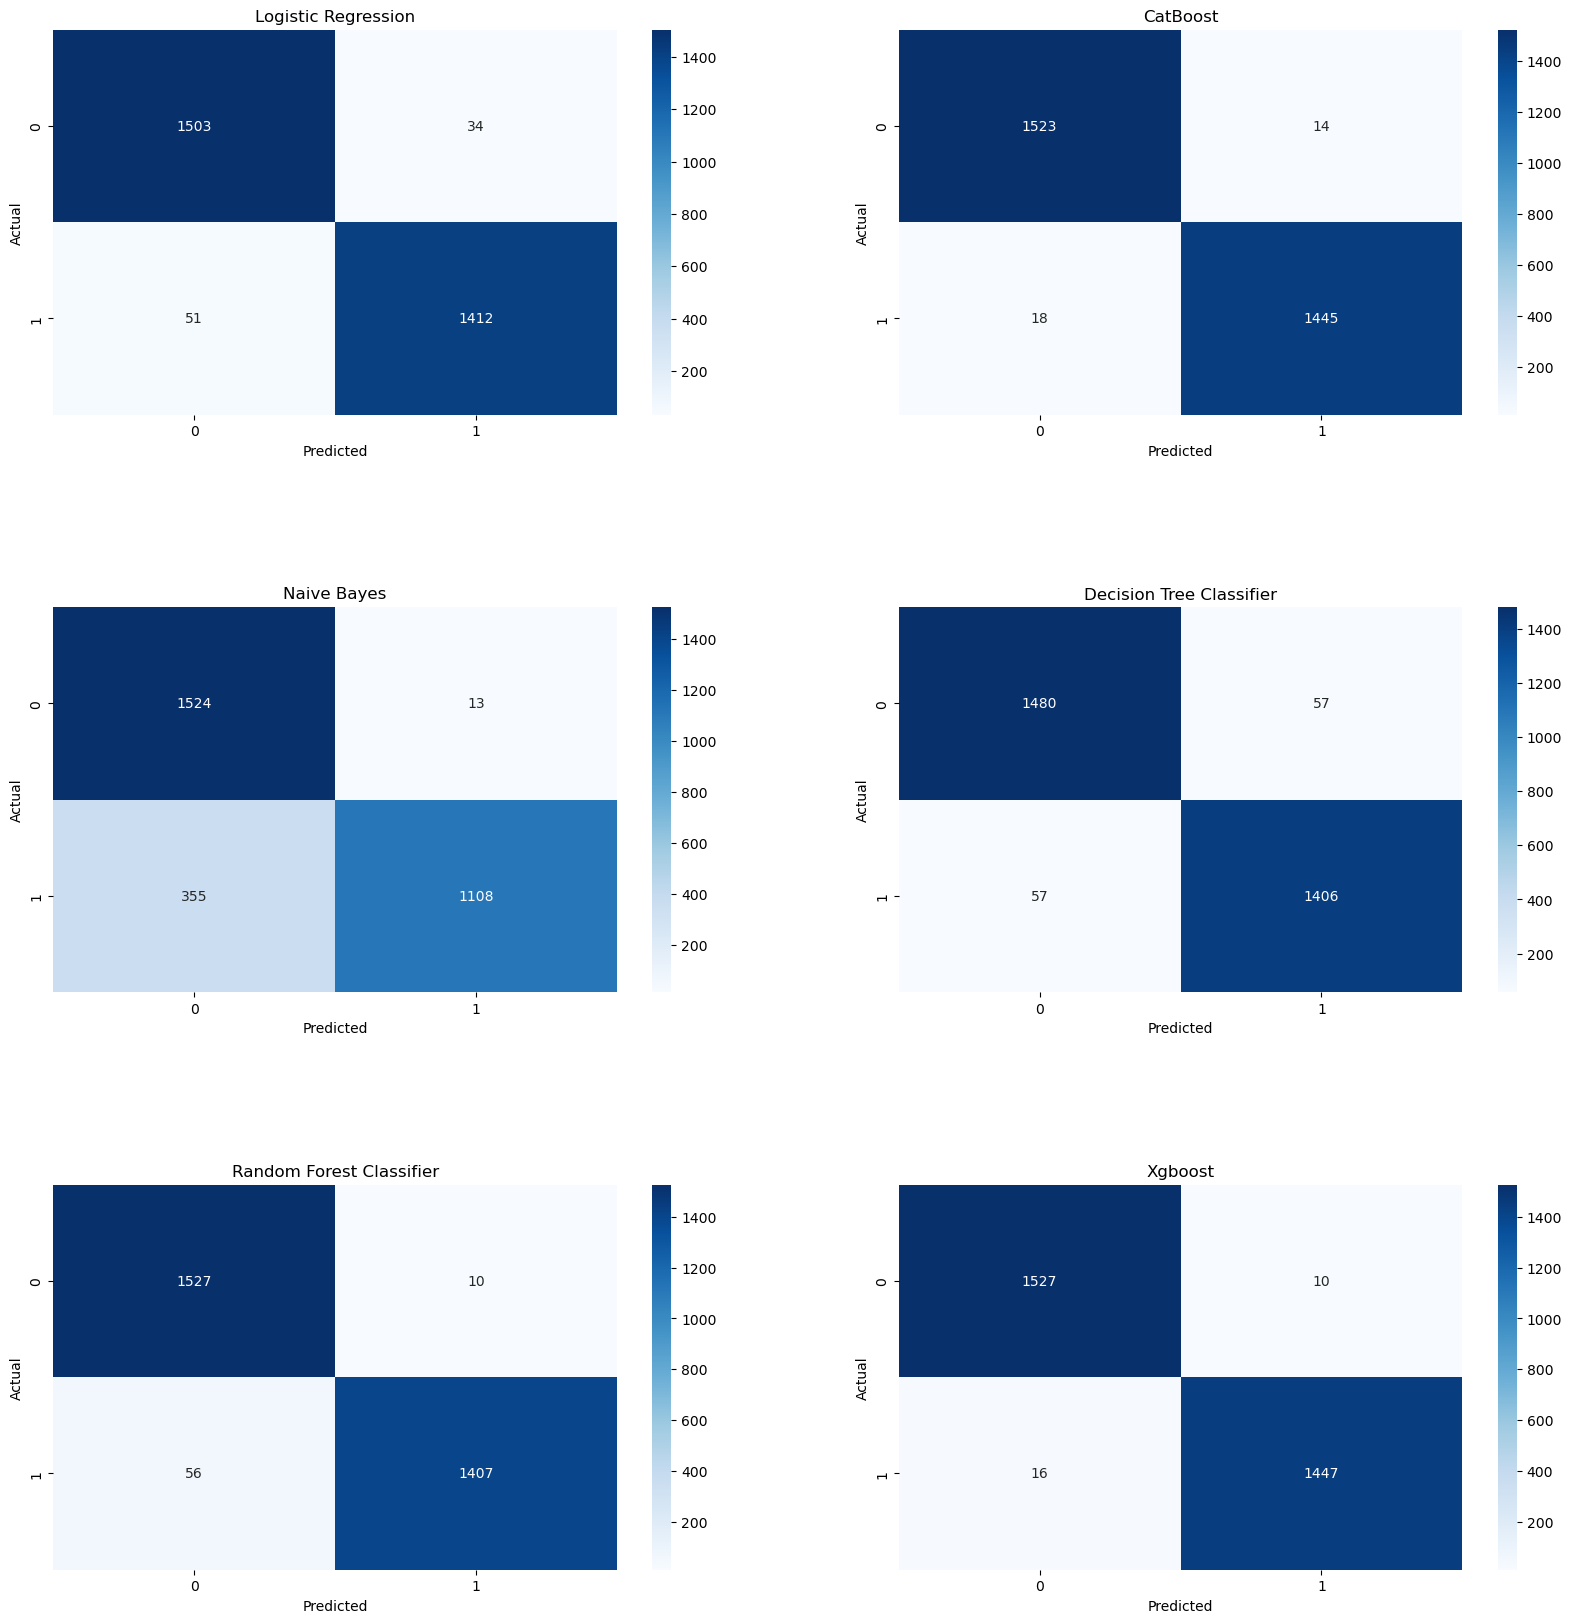

In [580]:
fig, ax = plt.subplots(3,2,figsize=(20,20))
fig.subplots_adjust(hspace=0.5)

sns.heatmap(confusion_matrix(y_test_mix, lr_pred_mix), annot=True, cmap='Blues', fmt='g', ax=ax[0,0]).set(title='Logistic Regression')
sns.heatmap(confusion_matrix(y_test_mix, catboost_pred_mix), annot=True, cmap='Blues', fmt='g', ax=ax[0,1]).set(title='CatBoost')
sns.heatmap(confusion_matrix(y_test_mix, nb_pred_mix), annot=True, cmap='Blues', fmt='g', ax=ax[1,0]).set(title='Naive Bayes')
sns.heatmap(confusion_matrix(y_test_mix, dtree_pred_mix), annot=True, cmap='Blues', fmt='g', ax=ax[1,1]).set(title='Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test_mix, rfc_pred_mix), annot=True, cmap='Blues', fmt='g', ax=ax[2,0]).set(title='Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test_mix, xgb_pred_mix), annot=True, cmap='Blues', fmt='g', ax=ax[2,1]).set(title='Xgboost')

# Set X-axis and Y-axis labels
ax[0, 0].set_xlabel('Predicted')
ax[0, 0].set_ylabel('Actual')

ax[0, 1].set_xlabel('Predicted')
ax[0, 1].set_ylabel('Actual')

ax[1, 0].set_xlabel('Predicted')
ax[1, 0].set_ylabel('Actual')

ax[1, 1].set_xlabel('Predicted')
ax[1, 1].set_ylabel('Actual')

ax[2, 0].set_xlabel('Predicted')
ax[2, 0].set_ylabel('Actual')

ax[2, 1].set_xlabel('Predicted')
ax[2, 1].set_ylabel('Actual')

plt.show()

## Classification Report

In [585]:
# print("lr_smote",classification_report(y_test_mix,lr_pred_mix), target_names=['Not Fraud', 'Fraud'])
print("lr",classification_report(y_test_mix,lr_pred_mix))
print("catboost", classification_report(y_test_mix,catboost_pred_mix))
print("knn", classification_report(y_test_mix,nb_pred_mix))
print("dtree", classification_report(y_test_mix,dtree_pred_mix))
print("rfc", classification_report(y_test_mix,rfc_pred_mix))
print("xgb", classification_report(y_test_mix,xgb_pred_mix))

lr               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1537
           1       0.98      0.97      0.97      1463

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000

catboost               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1537
           1       0.99      0.99      0.99      1463

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

knn               precision    recall  f1-score   support

           0       0.81      0.99      0.89      1537
           1       0.99      0.76      0.86      1463

    accuracy                           0.88      3000
   macro avg       0.90      0.87      0.87      3000
weighted avg       0.90      0.88      0.88      3000

dtr

### Accuracy, Recall, Precision, F1-Score

In [586]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, r2_score, mean_squared_error
from sklearn.metrics import precision_recall_curve

classifiers = [lr, catboost, nb_classifier, dtree, rfc, xgb]
classifier_names = ['Logistic Regression', 'Catboost', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost']
y_preds = [lr_pred_mix, catboost_pred_mix, nb_pred_mix, dtree_pred_mix, rfc_pred_mix, xgb_pred_mix]

In [591]:
# Calculate evaluation metrics for each model
def eval_metrics (classifier_names:list, y_preds:list, y_test:pd.DataFrame):
    
    for classifier_name, y_pred in zip(classifier_names, y_preds):
        # Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        # Recall
        recall = recall_score(y_test, y_pred)
        # Precision
        precision = precision_score(y_test, y_pred)
        # F1 score
        f1 = f1_score(y_test, y_pred)
        # R^2 score (if applicable, otherwise skip)
        # try:
        #     r2 = r2_score(y_test_smote, y_pred)
        # except ValueError:
        #     r2 = None
        # # Mean Squared Error (MSE) (if applicable, otherwise skip)
        # try:
        #     mse = mean_squared_error(y_test_smote, y_pred)
        # except ValueError:
        #     mse = None
        
        # Print or store the evaluation metrics for each model
        print(f'Metrics for {classifier_name}:')
        print(f'Accuracy: {accuracy}')
        print(f'Recall: {recall}')
        print(f'Precision: {precision}')
        print(f'F1 Score: {f1}')
        # if r2 is not None:
        #     print(f'R^2 Score: {r2}')
        # if mse is not None:
        #     print(f'MSE: {mse}')
        print('\n')

In [592]:
eval_metrics(classifier_names, y_preds, y_test_mix)

Metrics for Logistic Regression:
Accuracy: 0.9716666666666667
Recall: 0.9651401230348599
Precision: 0.9764868603042877
F1 Score: 0.9707803368855277


Metrics for Catboost:
Accuracy: 0.9893333333333333
Recall: 0.9876965140123035
Precision: 0.9904043865661412
F1 Score: 0.9890485968514716


Metrics for Naive Bayes:
Accuracy: 0.8773333333333333
Recall: 0.7573479152426521
Precision: 0.9884032114183765
F1 Score: 0.8575851393188856


Metrics for Decision Tree:
Accuracy: 0.962
Recall: 0.961038961038961
Precision: 0.961038961038961
F1 Score: 0.961038961038961


Metrics for Random Forest:
Accuracy: 0.978
Recall: 0.9617224880382775
Precision: 0.9929428369795342
F1 Score: 0.9770833333333334


Metrics for XGBoost:
Accuracy: 0.9913333333333333
Recall: 0.9890635680109364
Precision: 0.9931365820178449
F1 Score: 0.9910958904109589




### Accuracy

In [595]:
for classifier_name, y_pred in zip(classifier_names, y_preds):
    accuracy = accuracy_score(y_test_mix, y_pred)    
    print(f'Accuracy for {classifier_name}: {accuracy}')

Accuracy for Logistic Regression: 0.9716666666666667
Accuracy for Catboost: 0.9893333333333333
Accuracy for Naive Bayes: 0.8773333333333333
Accuracy for Decision Tree: 0.962
Accuracy for Random Forest: 0.978
Accuracy for XGBoost: 0.9913333333333333


### Recall

In [596]:
for classifier_name, y_pred in zip(classifier_names, y_preds):
    recall = recall_score(y_test_mix, y_pred)    
    print(f'Recall for {classifier_name}: {recall}')

Recall for Logistic Regression: 0.9651401230348599
Recall for Catboost: 0.9876965140123035
Recall for Naive Bayes: 0.7573479152426521
Recall for Decision Tree: 0.961038961038961
Recall for Random Forest: 0.9617224880382775
Recall for XGBoost: 0.9890635680109364


### Precision

In [597]:
for classifier_name, y_pred in zip(classifier_names, y_preds):
    precision = precision_score(y_test_mix, y_pred)   
    print(f'Precision for {classifier_name}: {precision}')

Precision for Logistic Regression: 0.9764868603042877
Precision for Catboost: 0.9904043865661412
Precision for Naive Bayes: 0.9884032114183765
Precision for Decision Tree: 0.961038961038961
Precision for Random Forest: 0.9929428369795342
Precision for XGBoost: 0.9931365820178449


### F1-Score

In [598]:
for classifier_name, y_pred in zip(classifier_names, y_preds):
    f1 = f1_score(y_test_mix, y_pred)  
    print(f'f1-score for {classifier_name}: {f1}')

f1-score for Logistic Regression: 0.9707803368855277
f1-score for Catboost: 0.9890485968514716
f1-score for Naive Bayes: 0.8575851393188856
f1-score for Decision Tree: 0.961038961038961
f1-score for Random Forest: 0.9770833333333334
f1-score for XGBoost: 0.9910958904109589


### Specificity

In [599]:
# Calculate specificity for each model
for classifier_name, y_pred in zip(classifier_names, y_preds):
    tn, fp, fn, tp = confusion_matrix(y_test_mix, y_pred).ravel()
    specificity = tn / (tn + fp)
    print(f'Specificity for {classifier_name}: {specificity}')

Specificity for Logistic Regression: 0.977878985035784
Specificity for Catboost: 0.9908913467794405
Specificity for Naive Bayes: 0.9915419648666233
Specificity for Decision Tree: 0.962914769030579
Specificity for Random Forest: 0.9934938191281718
Specificity for XGBoost: 0.9934938191281718


### Precision-Recall Curves

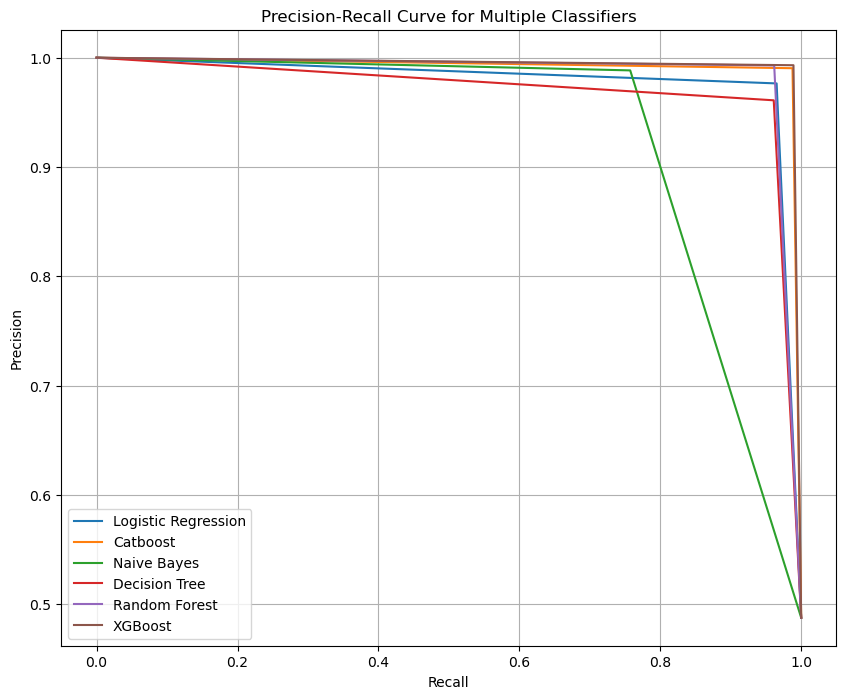

In [600]:
plt.figure(figsize=(10, 8))

for classifier_name, y_pred in zip(classifier_names, y_preds):
    precision, recall, _ = precision_recall_curve(y_test_mix, y_pred)
    plt.plot(recall, precision, label=classifier_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiple Classifiers')
plt.legend()
plt.grid(True)
plt.show()

## Feature Importance

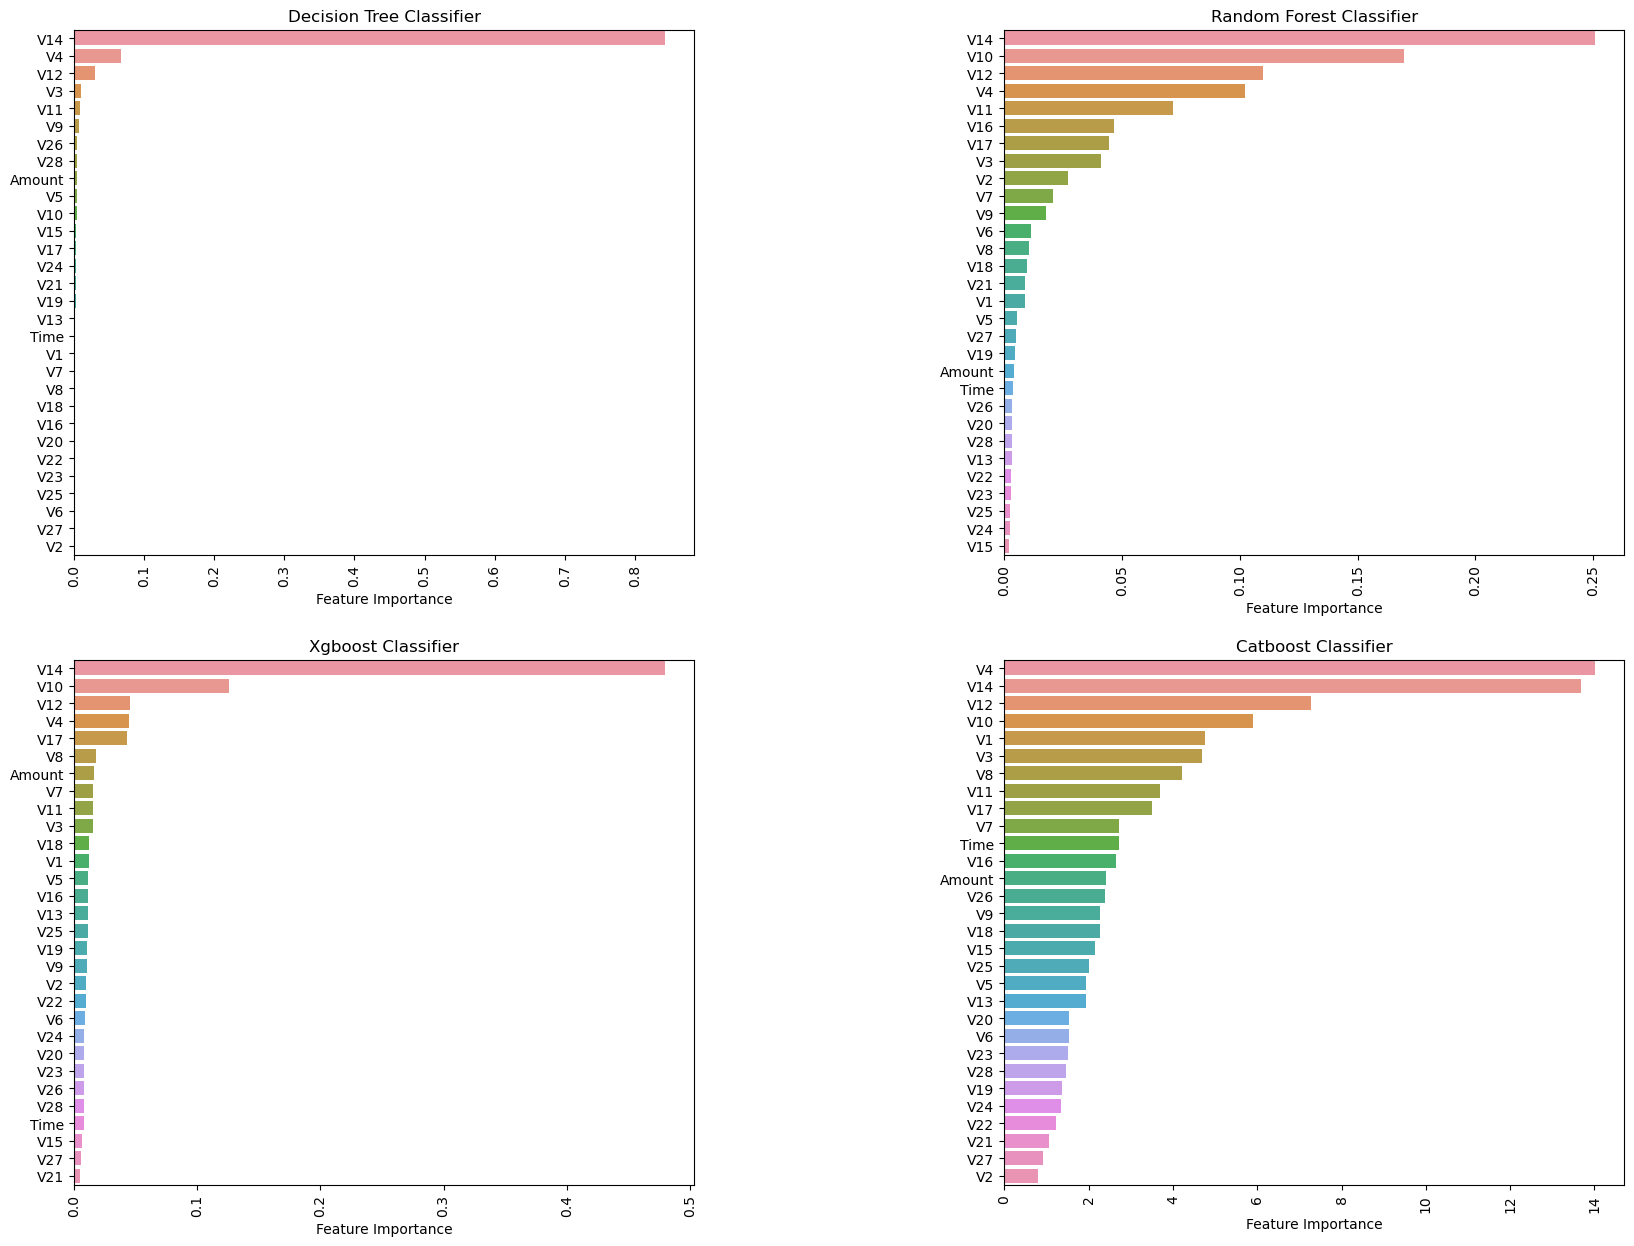

In [601]:
#feature importance for Decision Tree Classifier
feature_importance_dtree = pd.DataFrame(dtree.feature_importances_, index=X_train_mix.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

#feature importance for Random Forest Classifier
feature_importance_rfc = pd.DataFrame(rfc.feature_importances_, index=X_train_mix.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

#feature importance for Xgboost Classifier
feature_importance_xgb = pd.DataFrame(xgb.feature_importances_, index=X_train_mix.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

#feature importance for Xgboost Classifier
feature_importance_catboost = pd.DataFrame(catboost.feature_importances_, index=X_train_mix.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

fig, ax = plt.subplots(2,2,figsize=(20,15))
#space between subplots
fig.subplots_adjust(wspace=0.5)
sns.barplot(y=feature_importance_dtree.index, x=feature_importance_dtree['Feature Importance'], ax=ax[0,0]).set_title('Decision Tree Classifier')
ax[0,0].xaxis.set_tick_params(rotation=90)
sns.barplot(y=feature_importance_rfc.index, x=feature_importance_rfc['Feature Importance'], ax=ax[0,1]).set_title('Random Forest Classifier')
ax[0,1].xaxis.set_tick_params(rotation=90)
sns.barplot(y=feature_importance_xgb.index, x=feature_importance_xgb['Feature Importance'], ax=ax[1,0]).set_title('Xgboost Classifier')
ax[1,0].xaxis.set_tick_params(rotation=90)
sns.barplot(y=feature_importance_catboost.index, x=feature_importance_catboost['Feature Importance'], ax=ax[1,1]).set_title('Catboost Classifier')
ax[1,1].xaxis.set_tick_params(rotation=90)

## Observations:

1. Interestingly, for all model, they took V14 as the most important features.
2. However, for Catboost model seems to consider most of the features into the model architecture.

# Conclusion

### A. OBSERVATIONS
General: 
- Handling with imbalance dataset usecase. Count of fraud = 473 (0.17%) and not_fraud = 283k+ (99.83%).
- Since majority of the features already clean and produced from PCA, nothing much of cleaning can be done.
- All of the features from V1-V28 has a quick good distribution with mean 0.

Time:
- From the fraud distribution with transaction time. It is hard to identify if specific time contribute to credit card fraud cases.
- However, average transaction time for credit card fraud cases is 80450.5137s
- The standard deviation (std) of the Time distribution is quite high.

Amount:
- Amount has the min value is 0, mean 88.47, but the max is 25691.16. There are outliers or anomaly in this features distribution.
- Amount 0-50 contribute to higher credit card fraud cases.

### B. THE METHOD & TECHNIQUES

##### HANDLING IMBALANCE DATASET
* I try to train various model architecture with 3 types of featured engineered dataset:  
    i. SMOTE Dataset: Here, I implemented SMOTE method to upsampling the minority dataset from 473 sample to become 283k samples.   
    ii. Undersampling: I reduced the majority target class (280K) to match with the minority dataset 473.  
    iii. Mix: I reduce the maximum target class (280k) to become selected number_of_samples (e.g. 5000), and implement SMOTE for minority data 473 to become 5000.  

#### HANDLING OUTLIERS
- During test for handling outliers, if I use IQR to remove outliers, I will remove more than 28k data. I don't want to remove too many dataset since it might be the real world case scenario and not anomalies.
- Thefore, I try a different approach to handle this case:
    - apply logarithmic transformation
    - check for outliers
    - apply IQR on log data to remove outliers
    - This might reduce the number of removed dataset
    - After using this method, i just remove about 300 data only.

#### MODEL SELECTION
* For the model training, I want to experiment of the model performance for between 3 types training dataset (SMOTE, undersampling, mix)
* Since the problem is a descrete classification case, I try to train with the following model architecture:
    1. Logistic Regression
    2. Naive Bayes
    3. Decision Tree Classifier
    4. Random Forest Classifier
    5. XGBoost
    6. Catboost

#### EVALUATION
* Since this project handling imbalance data set, the most important evaluation metrix are recall, precision and f1-score, specificity, precision-recall curves.
* For fraud cases, since the original dataset is bias towards not fraud (0), I want to make sure that the model is not predicting high False Positive (Predicted = not fraud, Actual = fraud). 
* False Positive will have higher cost than False Negative in this case.
* I also want to look into evaluation metrix specificity (how well the model to predict no real event) = TN/(TN+FP)
* Based on the precision-recall curves, we can see that model using XGBoost outperform others by much, but outperform CatBoost by a little.
* Highest Accuracy: XGBoost
* Highest Recall: XGBoost
* Highest Precision: XGBoost
* Highest F1-Score: XGBoost
* Highest Specificity: XGBoost
* Highest Precision-Recall Curves: XGBoost

### C. MODEL SELECTION
Based on the evaluation metrix and the consideration of the imbalance dataset cases, I conclude that the best model for deployement is Xgboost, due to high metrix in precision, f1-score, specificity and precision-recall curves and using MIX mode of dataset for the training method.


### D. FUTURE ACTIONS
- N/A